In [ ]:
!nvidia-smi

Thu Dec 28 12:13:26 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

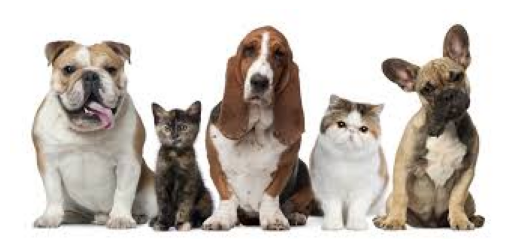

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
from IPython.display import display, Image
img = mpimg.imread('/content/dc.jpeg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [ ]:
#detection
!yolo task=detect mode=predict model=yolov8n.pt source="/content/dc.jpeg"

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dc.jpeg: 320x640 2 cats, 5 dogs, 157.4ms
Speed: 3.6ms preprocess, 157.4ms inference, 599.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


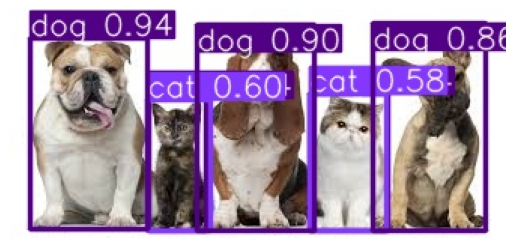

In [ ]:
img = mpimg.imread('/content/runs/detect/predict/dc.jpeg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [ ]:
#segmentation
!yolo task=segment mode=predict model=yolov8n-seg.pt source="/content/dc.jpeg"

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

image 1/1 /content/dc.jpeg: 320x640 4 dogs, 1 bear, 146.1ms
Speed: 3.0ms preprocess, 146.1ms inference, 488.8ms postprocess per image at shape (1, 3, 320, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


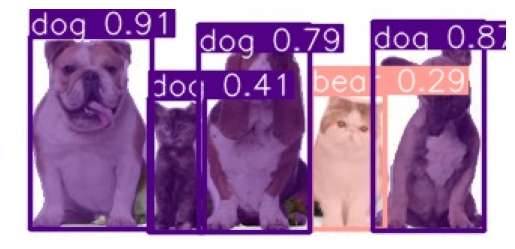

In [ ]:
img = mpimg.imread('/content/runs/segment/predict/dc.jpeg')
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/YOLOv8


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

 data		 'Masks detection on custom data.ipynb'   runs		    yolov8n.pt
 data.yaml	  mm.mp4				  ttt.mp4	    yolov8n-seg.pt
 masked_vid.mp4   msn.mp4				  Untitled0.ipynb   yolov8s.pt


In [ ]:
!ls /content/drive/MyDrive/YOLOv8

 data		 'Masks detection on custom data.ipynb'   runs		    yolov8n.pt
 data.yaml	  mm.mp4				  ttt.mp4	    yolov8n-seg.pt
 masked_vid.mp4   msn.mp4				  Untitled0.ipynb   yolov8s.pt


In [ ]:

%cd /content/drive/MyDrive/YOLOv8
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=125 imgsz=224 plots=True

/content/drive/MyDrive/YOLOv8
Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=125, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

In [ ]:
!ls runs/detect/train/

args.yaml					     labels.jpg    train_batch0.jpg
confusion_matrix_normalized.png			     P_curve.png   train_batch1.jpg
confusion_matrix.png				     PR_curve.png  train_batch2.jpg
events.out.tfevents.1703765650.e0dd1ab0f8ac.13164.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					     results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				     results.png   weights


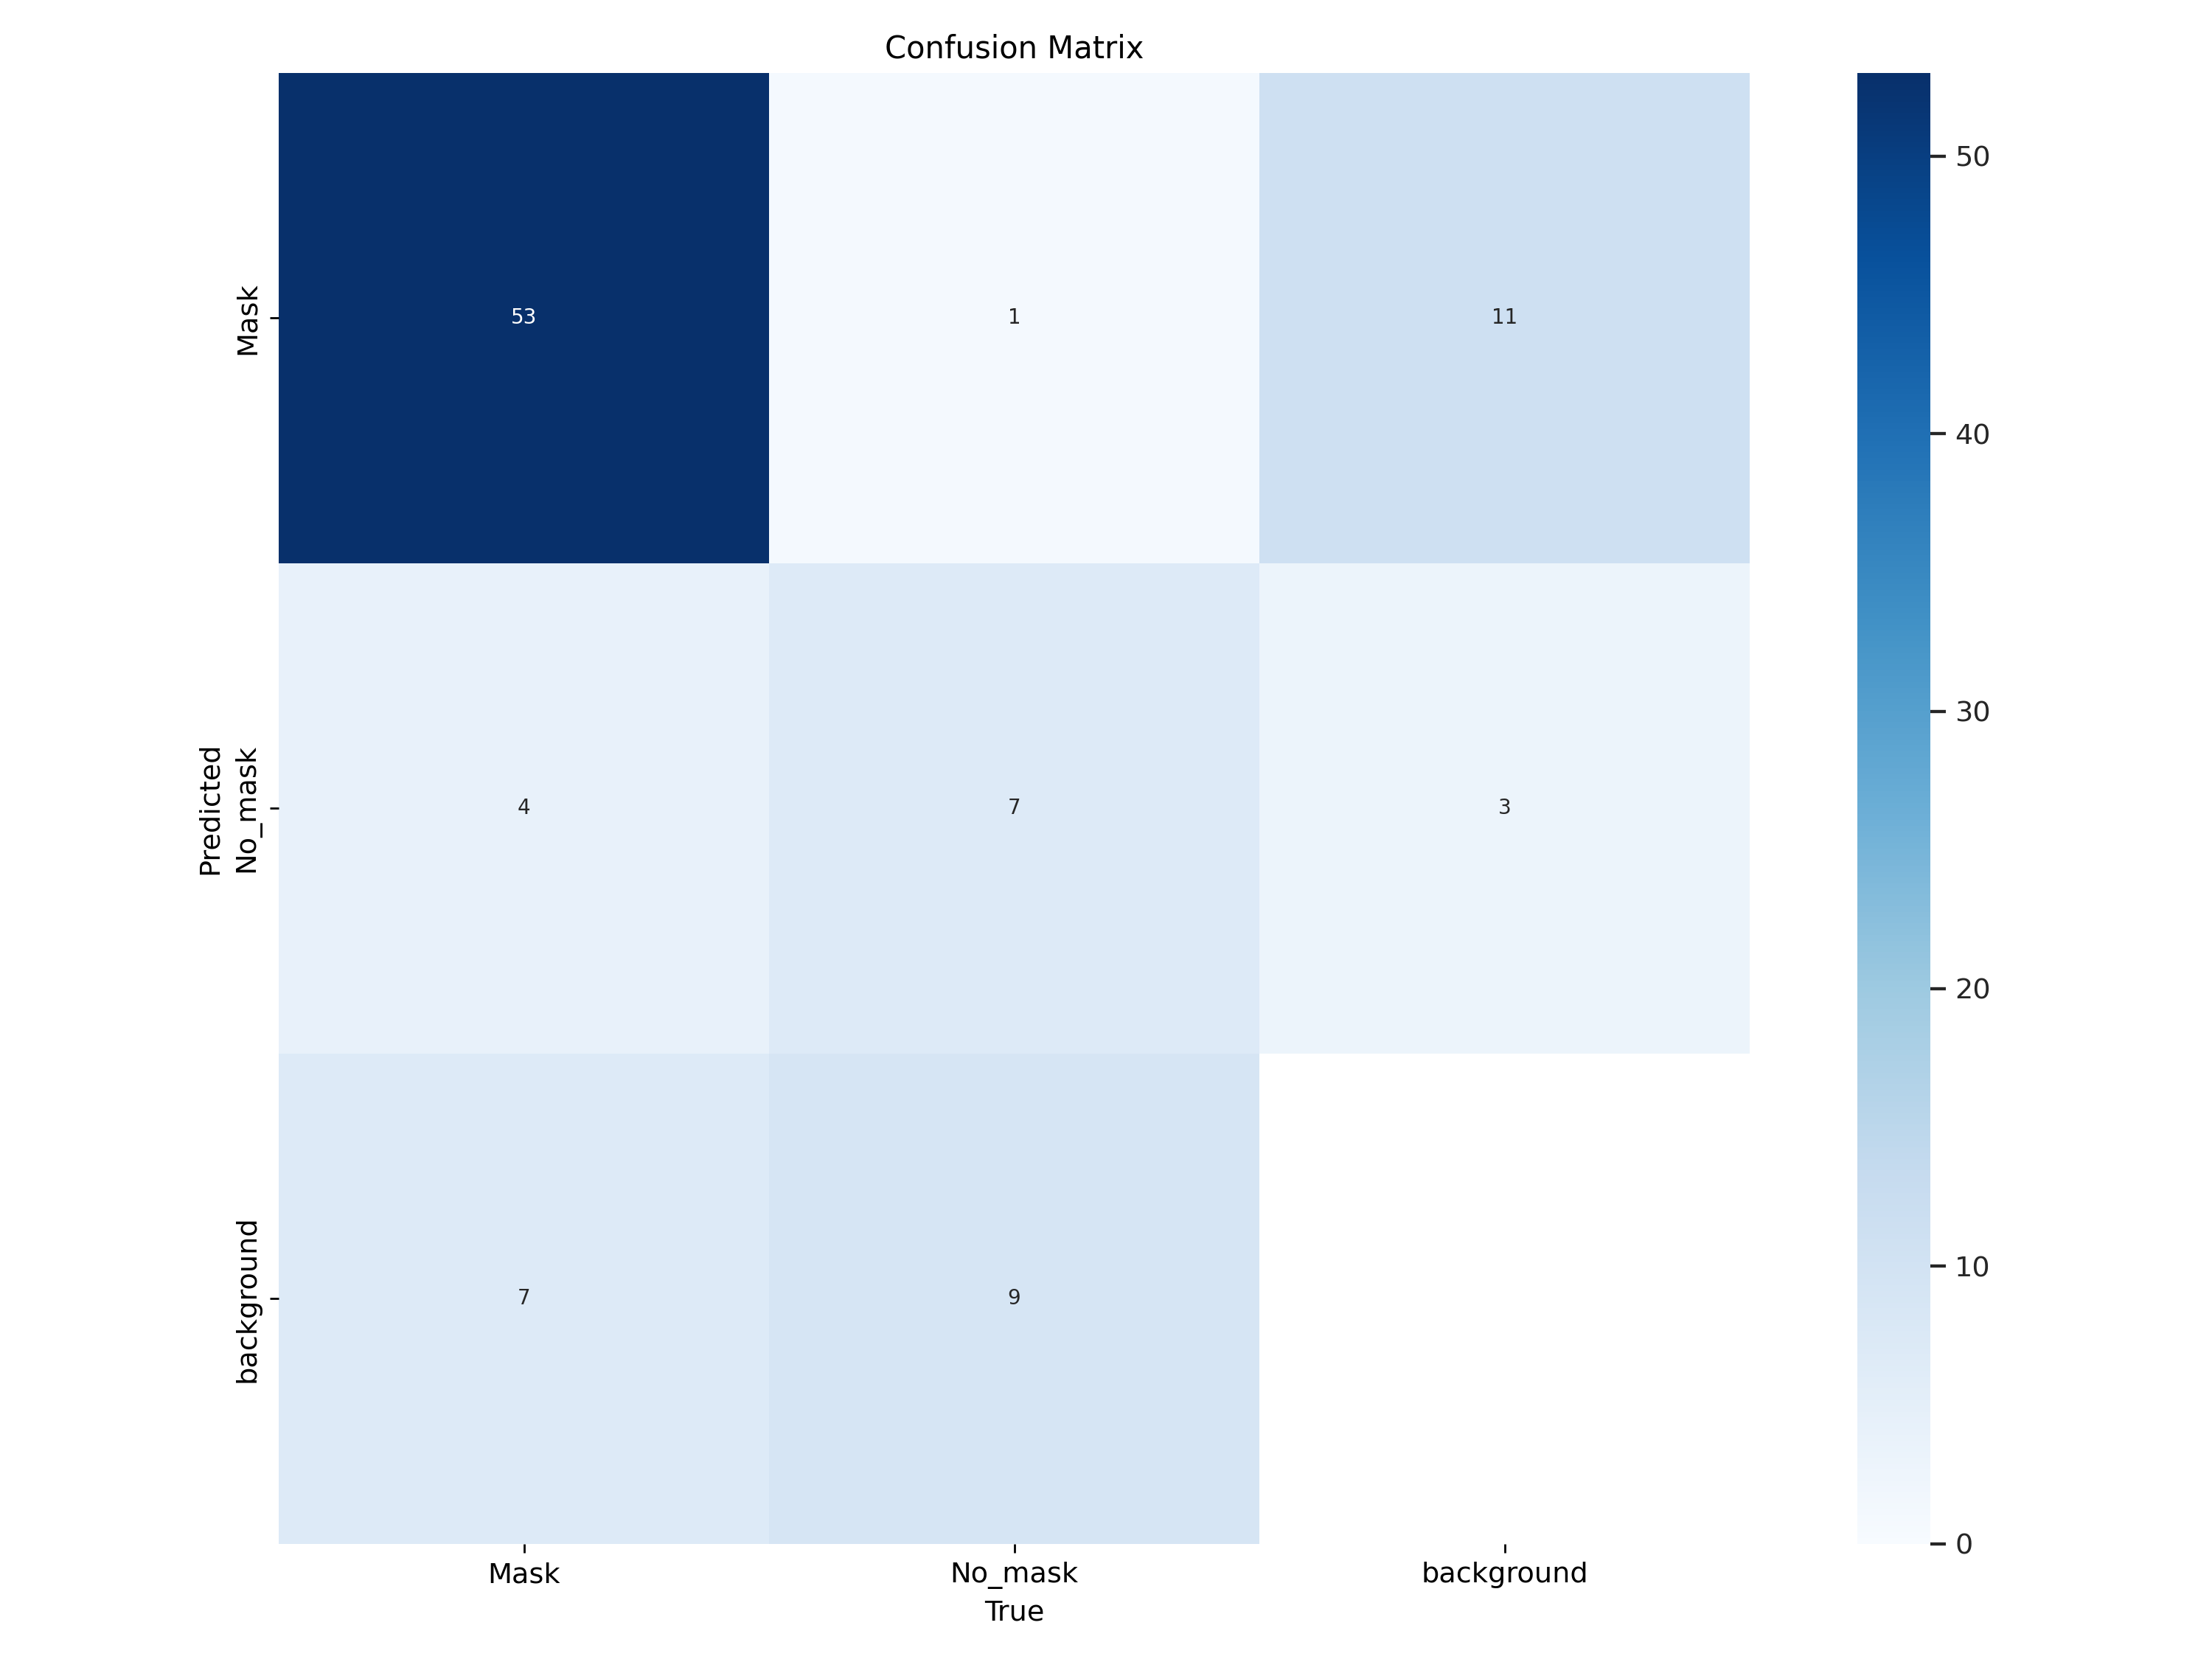

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

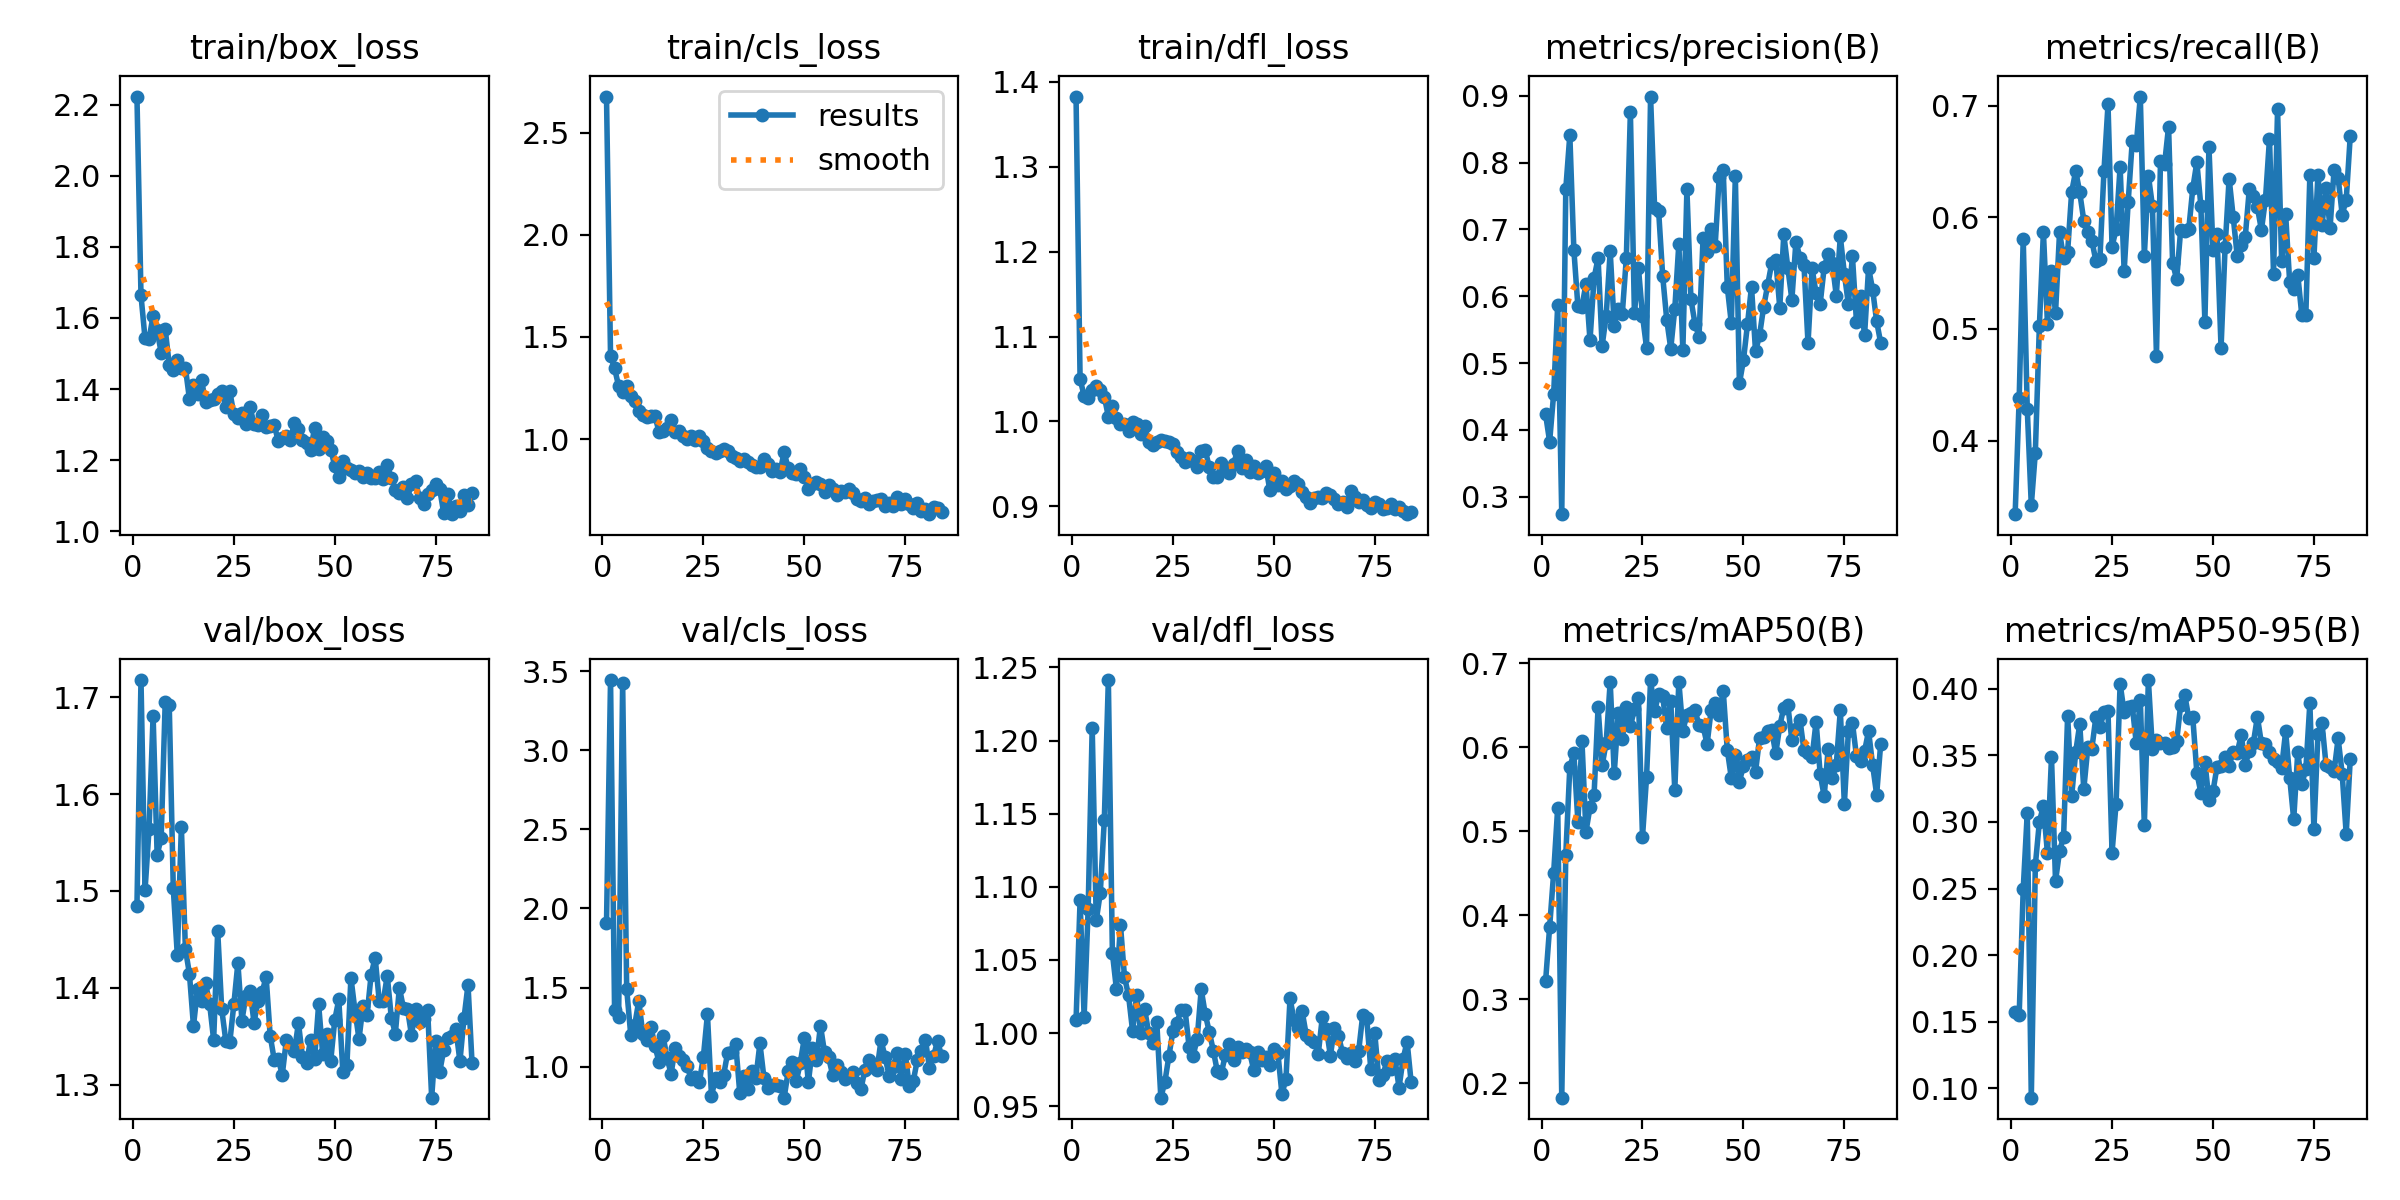

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

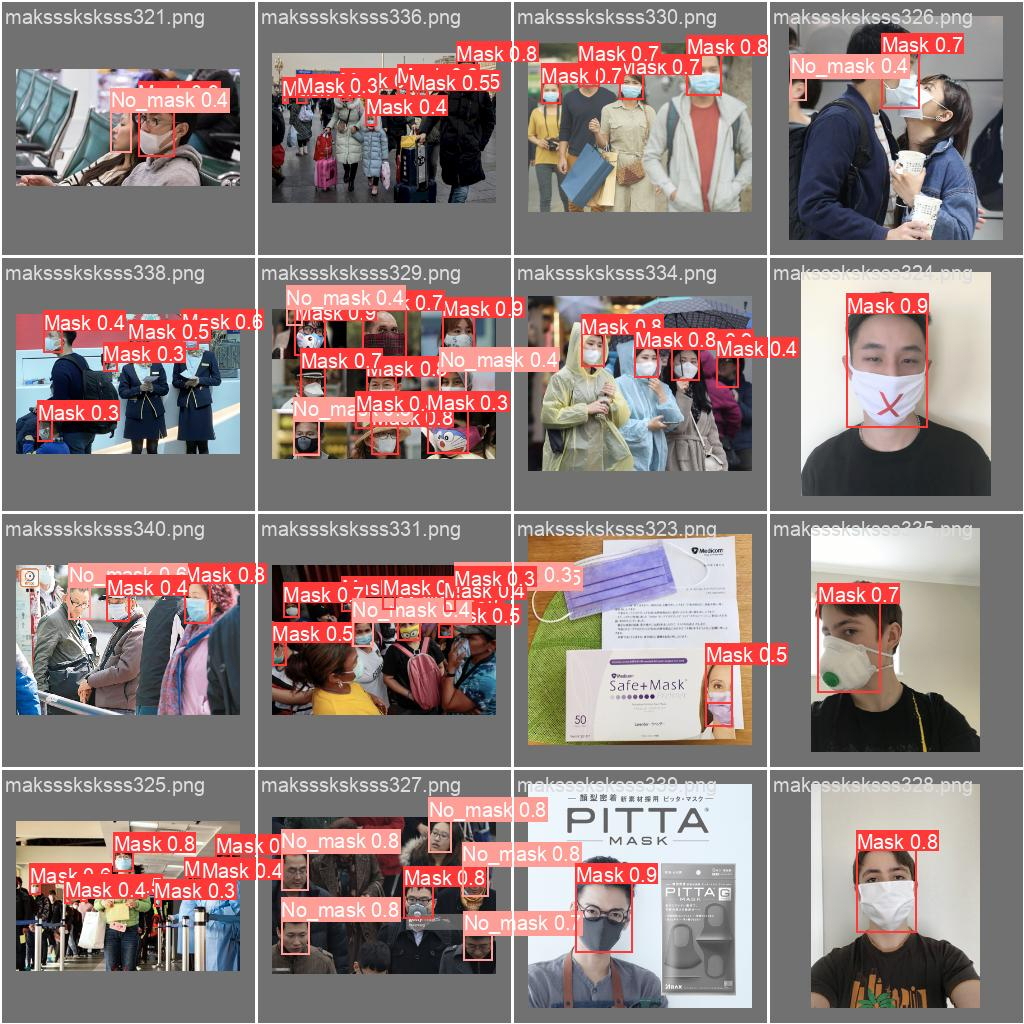

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLOv8/data/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.32s/it]
                   all         20         81      0.679      0.638      0.679      0.406
                  Mask         20         64      0.846      0.844      0.862      0.496
               No_mask         20         17      0.511      0.432      0.495      0.317
Speed: 0.6ms preprocess, 65.3ms inference, 0.0ms loss, 45.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss341.png: 224x192 1 Mask, 129.7ms
image 2/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss342.png: 160x224 13 Masks, 2 No_masks, 70.9ms
image 3/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss343.png: 224x192 1 Mask, 8.0ms
image 4/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss344.png: 128x224 3 Masks, 67.1ms
image 5/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss345.png: 160x224 1 Mask, 3 No_masks, 8.3ms
image 6/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss346.png: 224x224 3 Masks, 1 No_mask, 8.3ms
image 7/15 /content/drive/MyDrive/YOLOv8/data/test/images/maksssksksss347.png: 224x160 3 Masks, 2 No_masks, 69.0ms
image 8/15 /content/driv

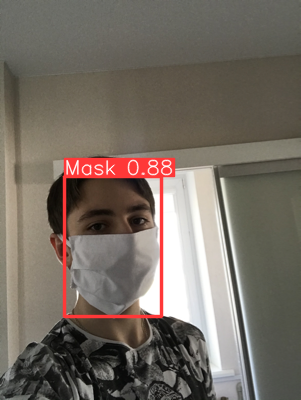

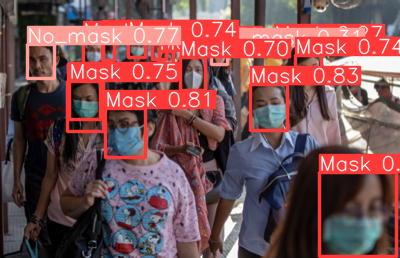

In [77]:
import glob
from IPython.display import Image, display
for image_path in glob.glob('runs/detect/predict2/*.png')[:2]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/masked_vid.mp4

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 17 Masks, 138.2ms
video 1/1 (2/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 18 Masks, 7.5ms
video 1/1 (3/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 16 Masks, 7.2ms
video 1/1 (4/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 18 Masks, 7.5ms
video 1/1 (5/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 20 Masks, 6.7ms
video 1/1 (6/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 19 Masks, 7.3ms
video 1/1 (7/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 20 Masks, 6.7ms
video 1/1 (8/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 18 Masks, 7.2ms
video 1/1 (9/660) /content/drive/MyDrive/YOLOv8/masked_vid.mp4: 128x224 19 Masks, 6.7ms
video 1/1 (10/660) /content/drive/My

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/mm.mp4

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 123.3ms
video 1/1 (2/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 10.4ms
video 1/1 (3/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 31.4ms
video 1/1 (4/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 13.3ms
video 1/1 (5/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 10.5ms
video 1/1 (6/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 10.5ms
video 1/1 (7/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 10.7ms
video 1/1 (8/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128x224 1 Mask, 4 No_masks, 11.4ms
video 1/1 (9/337) /content/drive/MyDrive/YOLOv8/mm.mp4: 128

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/msn.mp4

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 69.6ms
video 1/1 (2/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 12.5ms
video 1/1 (3/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 10.9ms
video 1/1 (4/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 10.6ms
video 1/1 (5/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 10.5ms
video 1/1 (6/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 10.7ms
video 1/1 (7/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 10.6ms
video 1/1 (8/414) /content/drive/MyDrive/YOLOv8/msn.mp4: 128x224 1 Mask, 4 No_masks, 10.6ms
video 1/1 (9/414) /content/drive/MyDrive/YOLOv8/msn.

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/YOLOv8/ttt.mp4

Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 75.6ms
video 1/1 (2/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 11.4ms
video 1/1 (3/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 10.8ms
video 1/1 (4/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 17.7ms
video 1/1 (5/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 17.3ms
video 1/1 (6/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 10.0ms
video 1/1 (7/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 14.4ms
video 1/1 (8/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 10.3ms
video 1/1 (9/247) /content/drive/MyDrive/YOLOv8/ttt.mp4: 224x128 1 Mask, 1 No_mask, 16.0ms
video 1/1 (10/247) /content/drive

In [ ]:
#full model link
https://drive.google.com/drive/folders/1p-NVDCZvPKYq-QAzcukigKOav2hTh_Sa